# **Hierarchical  Clustering**

In [ ]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score


import matplotlib.pyplot as plt
import seaborn as sns

# Setting logging to print only error messages from sklearn
import logging
logging.basicConfig()
logging.getLogger("SKLEARNEX").setLevel(logging.ERROR)

# Import warnings module
import warnings
warnings.filterwarnings("ignore") # Ignore warnings


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Business Analytics/Teaching materials/MIS 451/Q251/Week 6 - Clustering/Mall_Customers.csv'

In [ ]:
df = pd.read_csv(file_path)

## **EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.drop(columns=["CustomerID"]).describe(include="all")

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


<Axes: xlabel='count', ylabel='Gender'>

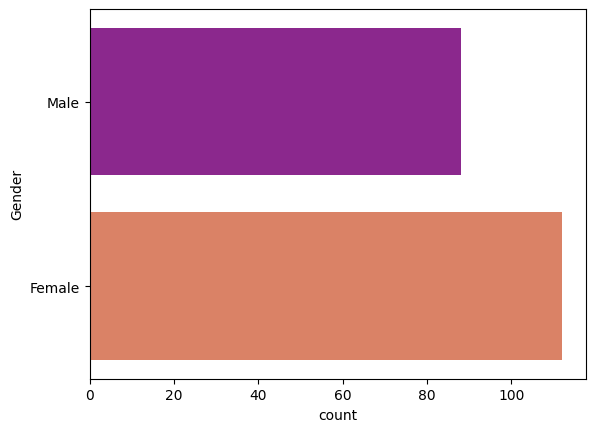

In [ ]:
sns.countplot(df['Gender'], palette='plasma')

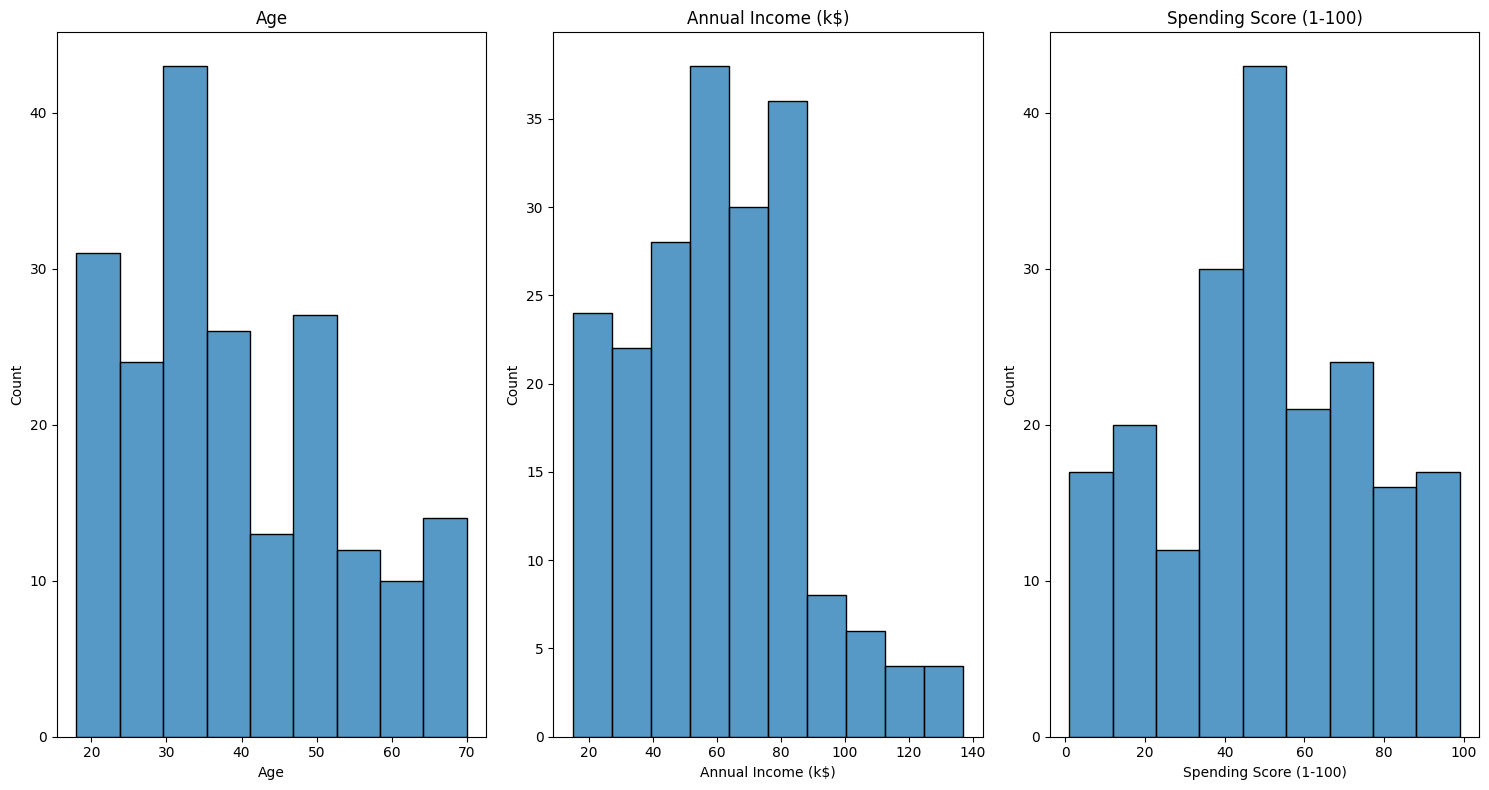

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i, colname in enumerate(num_cols):
    sns.histplot(data=df, x=colname, ax=axes[i])
    axes[i].set_title(colname)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

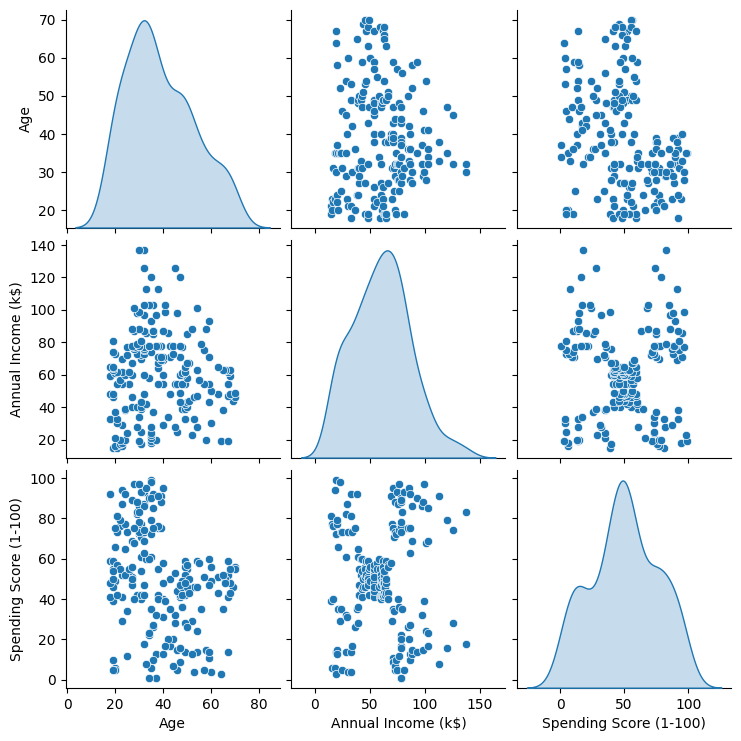

In [ ]:
pair_plot = sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']],
                        diag_kind='kde',
                         palette='plasma')

<Axes: >

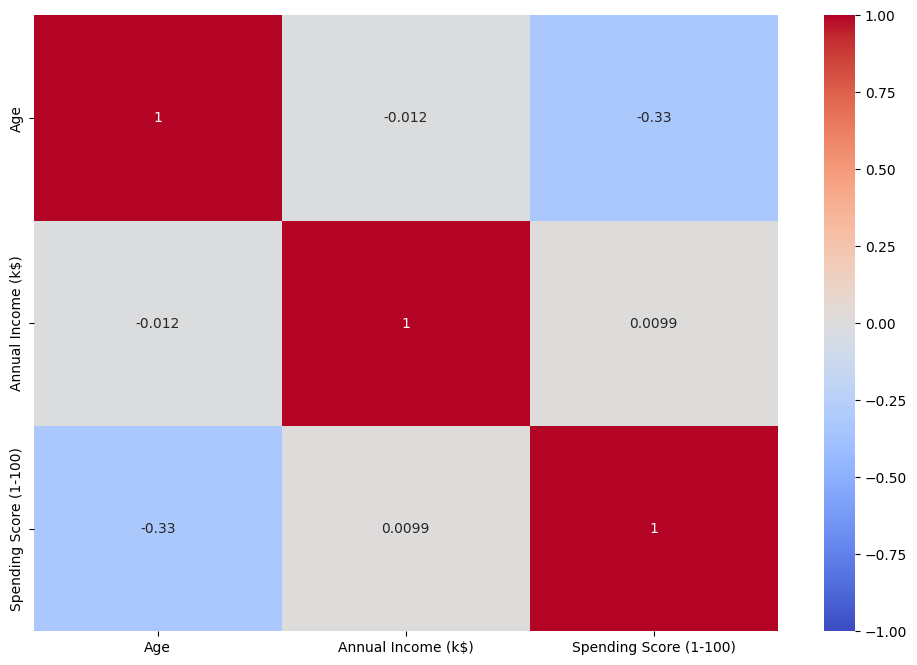

In [ ]:
# Select columns for correlation analysis
cols_cor = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Compute correlation matrix
correlation_matrix = df[cols_cor].corr()

plt.figure(figsize=(12, 8))

# Display correlation matrix in a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

## **Model Development**

In [ ]:
X = df.iloc[:, 3:].values

**Dendrogram**

Text(0, 0.5, 'Euclidean distance')

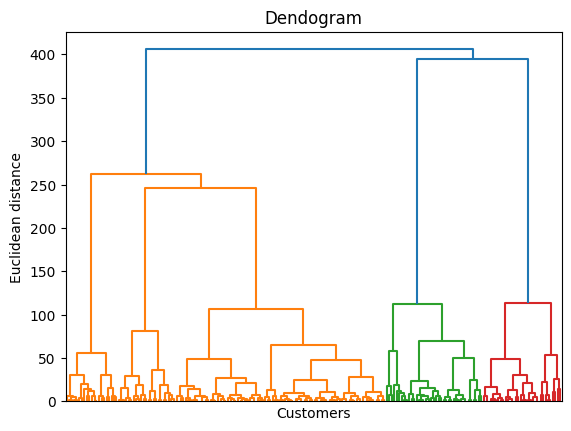

In [ ]:
dendogram = sch.dendrogram(sch.linkage(X, method='ward', metric='euclidean'), no_labels=True)
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')

**Model Building**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, linkage='ward', metric='euclidean')
hc.fit(X)

AgglomerativeClustering(n_clusters=5)

**Visualising the clusters**

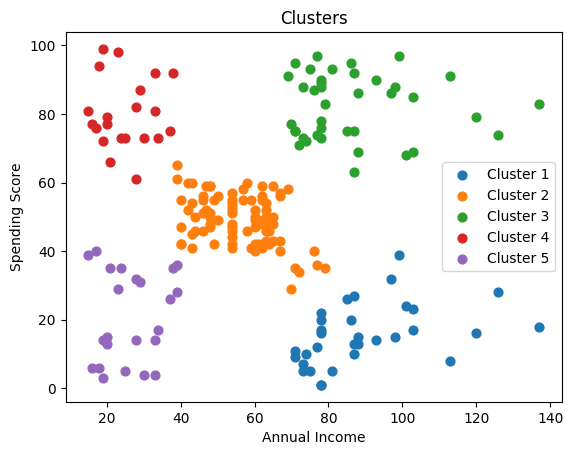

In [ ]:
for i in range(hc.n_clusters_):
    plt.scatter(X[hc.labels_ == i, 0], X[hc.labels_ == i, 1],
                s=40, label=f'Cluster {i+1}')

plt.title('Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

In [ ]:
labels = AgglomerativeClustering(n_clusters=5, linkage='ward').fit_predict(X)

df_out = df.copy()
df_out["cluster"] = labels + 1
print(df_out["cluster"].value_counts().sort_index())

cluster
1    32
2    85
3    39
4    21
5    23
Name: count, dtype: int64


In [ ]:
df_out.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,4
2,3,Female,20,16,6,5
3,4,Female,23,16,77,4
4,5,Female,31,17,40,5


<Axes: xlabel='cluster', ylabel='Annual Income (k$)'>

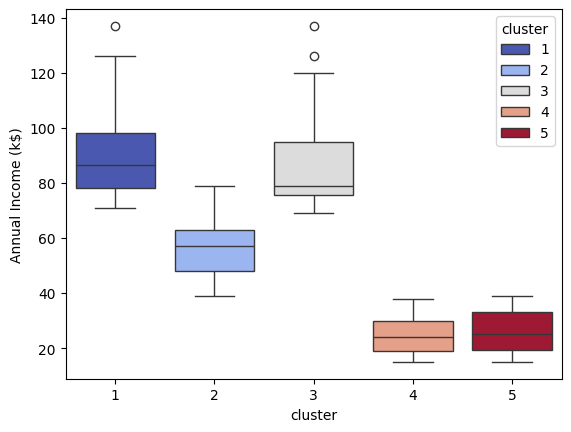

In [ ]:
sns.boxplot(data=df_out, x="cluster", y="Annual Income (k$)", hue="cluster", palette= 'coolwarm')

<Axes: xlabel='cluster', ylabel='Spending Score (1-100)'>

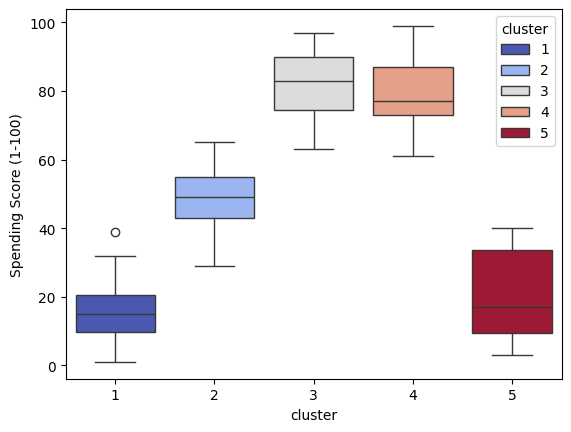

In [ ]:
sns.boxplot(data=df_out, x="cluster", y="Spending Score (1-100)", hue="cluster", palette= 'coolwarm')


## **Model Evaluation**

In [ ]:
from sklearn.metrics import silhouette_score
sil = silhouette_score(X, labels)
print(round(sil, 3))

0.553


# **Citing this Notebook**
If you use this notebook in your work, please cite it as follows:

Linh, H. (2025). Machine Learning for Business. Lecture examples and exercises. (Version 1.0.0). URL: https://github.com/MsLinhEIU/MIS-451---Machine-Learning-for-Business-Analytics/tree/main